In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import os

In [2]:
# Read in the csv
df = pd.read_csv("../Resources/Autism.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

# View all columns
pd.set_option('display.max_columns', None)

print(df.shape)
df.head()

(1117, 23)


,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


# Violin Plot

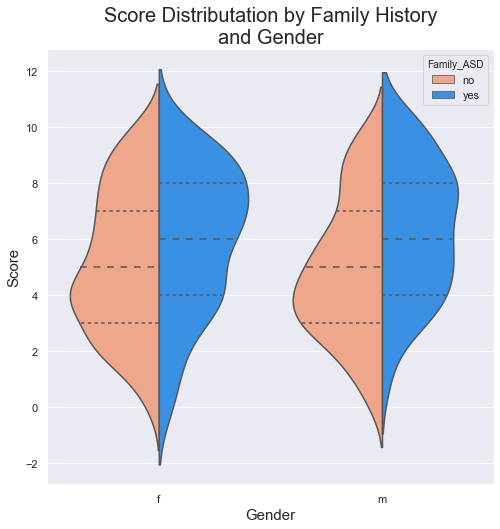

In [3]:
# Violin Plot: Score and Sex by Family History of Autism

# First set figure size
plt.figure(figsize=(8,8))

# Set up visualiation
sns.set(style="darkgrid")
ax = sns.violinplot(x="Sex", y="Score", hue="Family_ASD", data=df, split=True,
               inner="quartile", palette={'no': "lightsalmon", 'yes': "dodgerblue"})

# Format titles and labels
ax.set_title('Score Distributation by Family History\n'
             'and Gender', fontsize=20)

ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel('Score', fontsize=15)

# Save image
plt.savefig(os.path.join("..", "Images", "Violin_Family_Gender.png")) 

### Observations:
Doing a violin plot broken down by sex first and then yes or no to family history of autism.
FAMILY HISTORY: Doesn't appear to be a big difference between men and women with a family history of autism.  The difference comes between the answers to a family history.  Looks like across the board, 75% of males and females w/o a family history fall below a score of 7.  Whereas those with a family history, there's a higher 75th percentile score of 8.  And that appears across the board, a one point higher difference between the family and non-family groups.

# Boxplot Series by App User

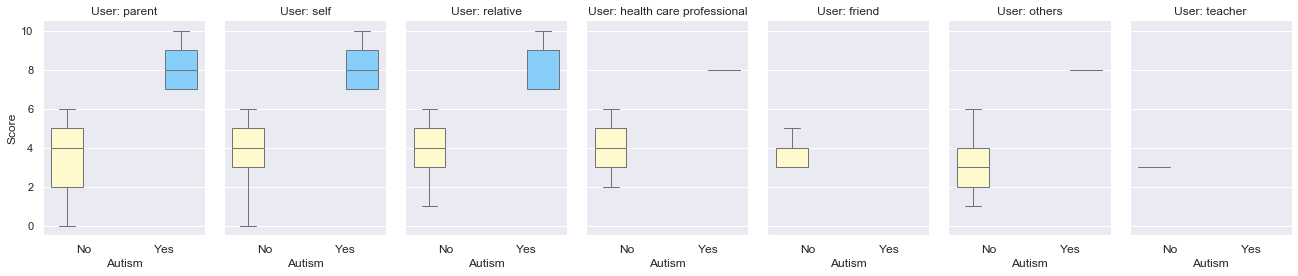

In [4]:
# Looking at boxplots as it pertains to who takes the test and the resulting score

# Create 7 boxplots that will be broken down my user who took test and resulting classification
g = sns.catplot(x="Class", y="Score", hue="Class",
                col="User", data=df, kind="box", 
                size=4, aspect=.65, 
                palette={'NO': "lemonchiffon", 'YES': "lightskyblue"}, linewidth=1,
                saturation=1)

# Set labels
(g.set_axis_labels("Autism", "Score")
  .set_xticklabels(['No', 'Yes'], fontsize=12)
  .set_titles("{col_var}: {col_name}"))

# Save figure
plt.savefig(os.path.join("..", "Images", "TestTakerBoxPlots.png"))

### Observations:
Looking across all of the boxplots, there appears to be a stable median 50% across both groups.  This could indicate that the test is viable in terms of giving steady results, not largely swayed based on who's taking it.     

# Stats Table Creation

In [5]:
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


In [6]:
# Count participants
participants = df['Case No'].nunique()
print(participants)

1117


In [7]:
# Age statistics

max_age = df['Age'].max()
min_age = df['Age'].min()
median_age = df['Age'].median()
print(max_age)
print(min_age)
print(median_age)

80
17
28.0


In [8]:
# Gender numbers

# Men
men_df = df.loc[df['Sex'] == 'm']
men = men_df['Case No'].count()

# Women
women_df = df.loc[df['Sex'] == 'f']
women = women_df['Case No'].count()

In [9]:
# Autism Label

# Those with Autism
yes_df = df.loc[df['Class'] == 'YES']
yes = yes_df['Case No'].count()

# Those without Autism
no_df = df.loc[df['Class'] == 'NO']
no = no_df['Case No'].count()

# Percentages
# Formatted once put into the table
yes_percent = (yes / participants)
no_percent = (no / participants)

In [10]:
# Create dataframe with values found

table_df = pd.DataFrame([{"Total Participants": participants,
                          "Min Age": min_age,
                          "Max Age": max_age,
                          "Avg Age (median)": median_age,
                          "Men": men,
                          "Women": women,
                          "Percent with Autism": yes_percent,
                          "Without Autism": no_percent}])


# Format percentages
table_df["Percent with Autism"] = table_df["Percent with Autism"].map("{:,.2%}".format)
table_df["Without Autism"] = table_df["Without Autism"].map("{:,.2%}".format)

table_df

,Total Participants,Min Age,Max Age,Avg Age (median),Men,Women,Percent with Autism,Without Autism
0,1117,17,80,28.0,595,522,32.05%,67.95%


In [11]:
# Rename the index
table_df = table_df.rename(index={0:'Participant Breakdown'})
table_df

,Total Participants,Min Age,Max Age,Avg Age (median),Men,Women,Percent with Autism,Without Autism
Participant Breakdown,1117,17,80,28.0,595,522,32.05%,67.95%


In [12]:
# Transpose the dataframe for easier reading
table = table_df.T
table

,Participant Breakdown
Total Participants,1117
Min Age,17
Max Age,80
Avg Age (median),28
Men,595
Women,522
Percent with Autism,32.05%
Without Autism,67.95%


In [13]:
# Save table to html so that we can put it into the webpage
table.to_html("../Resources/QuickStatsTable.html")

### OBSERVATIONS
Not much here for observations.  Table creation is just to give a quick overview of the data we're working with.  To be put into our webpage.

# Age Distribution

In [14]:
# Define max and min ages in order to set the x-axis limits
age_min = df['Age'].min()
age_max = df['Age'].max()
print(f"The minimum age is: {age_min}")
print(f"The maximum age is: {age_max}")

The minimum age is: 17
The maximum age is: 80


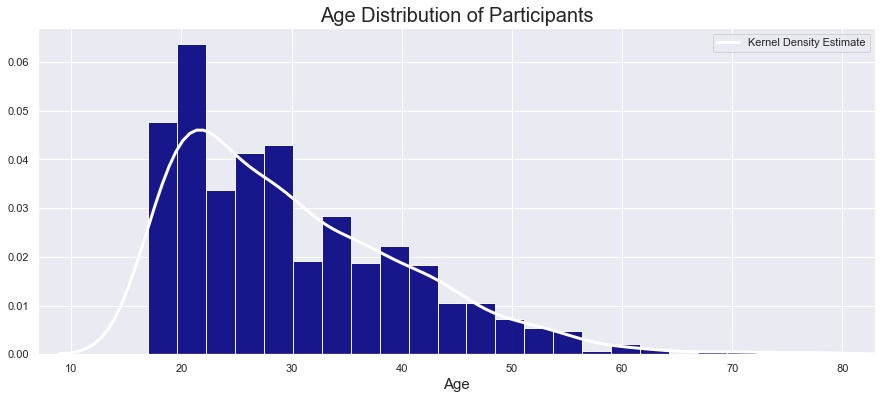

In [15]:
# Plot age distribution using seaborn distplot

# Set parameters
plt.figure(figsize=(15,6))
x = df['Age']
sns.set_style("darkgrid")
ax = sns.distplot(x, 
                  kde_kws={"color": "white", "lw": 3, 
                           "label": "Kernel Density Estimate"},
                  hist_kws={"alpha": .9, "color": "navy"})

# Format labeling
ax.set_title('Age Distribution of Participants', fontsize=20)
ax.set_xlim(age_min - 10, age_max + 3)
ax.set_xlabel('Age',fontsize=15)

# Save figure
plt.savefig(os.path.join("..", "Images", "AgeDistribution.png"))

### OBSERVATIONS

The age of participants is not noramlly distributed.  It is right-skewed, meaning the tail of the distribution is longer on the right-side than the left-side. Going back to the correlation map, all correlations to Age range from -0.073 to 0.08.
      
Due to the age not being normally distributed, we might be losing subtle changes.  But if there were a high correlation, it would show regardless.  Even if we don't have as many datapoints in the higher age range, the correlation would still appear.  Ultimately, we might be losing subltle differences here.